In [1]:

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:

import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [ ]:

# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Prints the file path as a check we are in the correct directory 
import os
print(os.getcwd())


/Users/matthewguy422/Documents/du_bootcamp/sqlalchemy-challenge/SurfsUp/Starter_Code


In [6]:

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [7]:

# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:

# Save references to each table, creates python references to the tables allowing interaction using SQLAlchemy ORM
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:

# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:

# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()

# Display the most recent date 
most_recent_date


'2017-08-23'

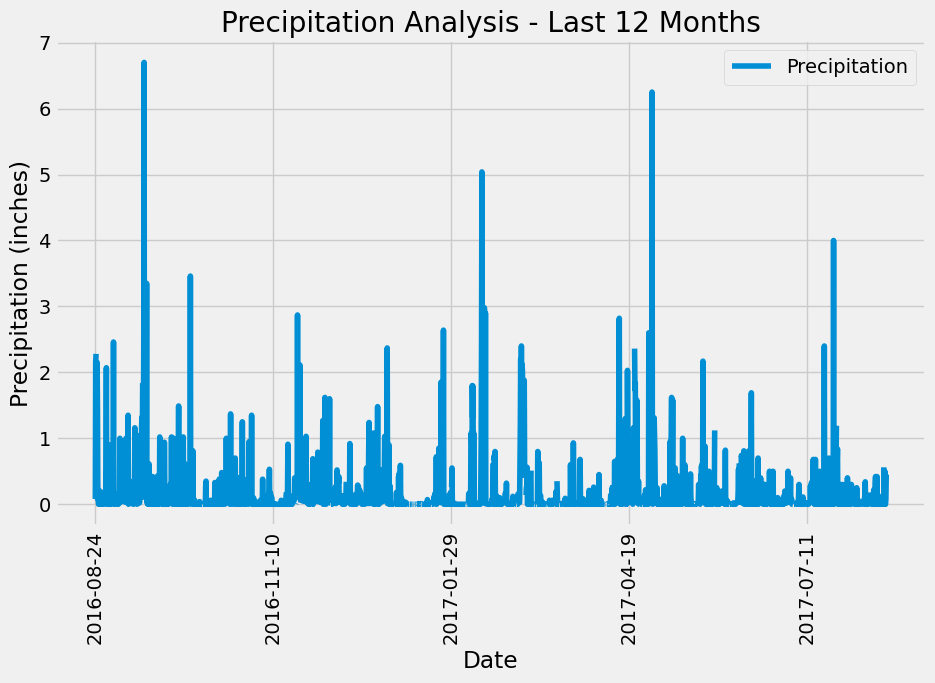

In [ ]:

# Design a query to retrieve the last 12 months of precipitation data and plot the results.

# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in dataset.
one_year_ago = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores for the last 12 months
precip_data = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= one_year_ago)\
    .order_by(Measurement.date)\
    .all()

# Save the query results as a Pandas DataFrame and set column names
precip_df = pd.DataFrame(precip_data, columns=["date", "precipitation"])

# Sort the DataFrame by date (already ordered in query)
precip_df.set_index("date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(figsize=(10, 6), rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation Analysis - Last 12 Months")
plt.legend(["Precipitation"])
plt.show()

In [13]:

# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:

# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

# Display the total number of stations
total_stations

9

In [15]:

# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc())\
    .all()

# Display the results
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:

# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Identify the most active station (first entry in the list from previous query)
most_active_station_id = most_active_stations[0][0]

# Query to find the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station_id).all()

# Display the results
temperature_stats

[(54.0, 85.0, 71.66378066378067)]

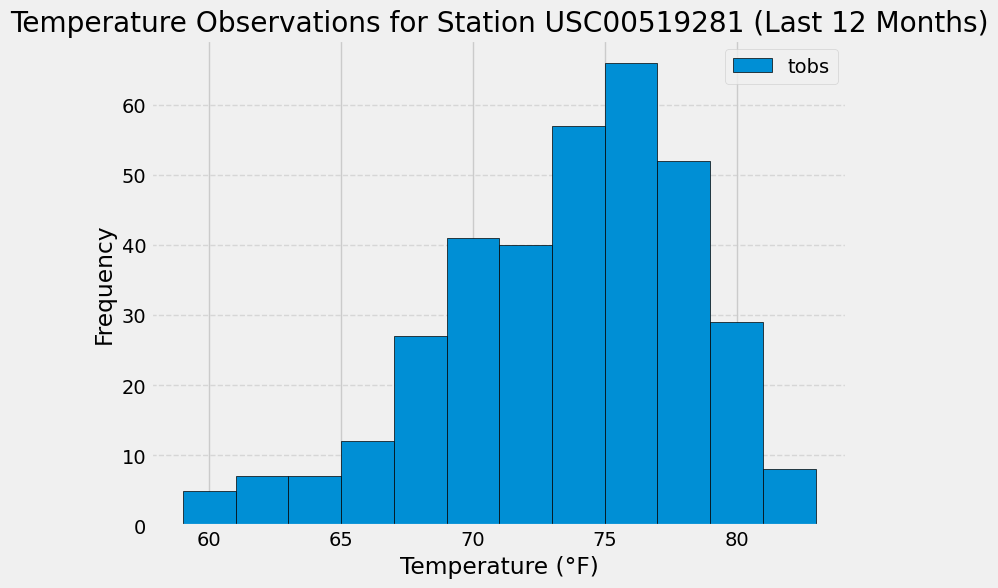

In [ ]:

# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs_data = session.query(Measurement.tobs)\
    .filter(Measurement.station == most_active_station_id)\
    .filter(Measurement.date >= one_year_ago)\
    .all()

# Convert query results to a Pandas DataFrame
tobs_df = pd.DataFrame(tobs_data, columns=["temperature"])

# Plot the results as a histogram with bins=12
plt.figure(figsize=(8,6))
plt.hist(tobs_df["temperature"], bins=12, edgecolor="black")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title(f"Temperature Observations for Station {most_active_station_id} (Last 12 Months)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add the legend 
plt.legend(["tobs"])  

# Show the plot
plt.show()



# Close Session

In [20]:
# Close Session
session.close()